In [3]:
!pip install scipy numpy

In [4]:
from scipy.io import loadmat
import numpy as np

In [5]:
d = loadmat ('file1.mat')

FileNotFoundError: [Errno 2] No such file or directory: 'file1.mat'

In [ ]:
x = d['X']
y = d['Y'].flatten()
print (f'Num Features:{x.shape[1]}')
print (f'Num Samples:{x.shape[0]}')
print (f'X Shape:{x.shape} Y Shape: {y.shape}')
print (f'Num Classes:{np.unique(y).size}')

NameError: name 'd' is not defined

# Data Analysis

In [6]:
# Import necessary libraries
import os
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from my_radar_dataset import MyRadarDataset

In [26]:
# Load the dataset
folder_path = 'mat_files'
dataset = MyRadarDataset()
dataset.load(folder=folder_path)

# Convert data to DataFrame for easier analysis
data = np.concatenate(dataset.data).reshape(-1, 8)
labels = np.concatenate(dataset.labels).flatten()
files = np.array(dataset.files)
num_features = data.shape[1]
df = pd.DataFrame(data, columns=[f"Feature_{i}" for i in range(1, num_features+1)])
df['Label'] = labels
df['File'] = files


Features statistics

In [27]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Basic statistics
df.describe()

Missing values:
Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Feature_7    0
Feature_8    0
Label        0
File         0
dtype: int64


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Label
count,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000
mean,1.247438,0.698267,130.433564,83.184991,1.477667,134.151830,-0.002249,15.853280,3.059852
std,144.537423,146.127915,227.838255,163.175909,12.949225,1230.241654,0.432234,14.520763,1.101939
min,-2233.352219,-3733.913083,-487.967214,-363.110212,-63.846908,0.000004,-1.000000,0.253933,1.000000
25%,-46.849663,-46.423003,11.712385,23.948239,-3.663534,0.083179,0.048214,5.038464,2.000000
50%,0.000000,0.000000,42.414121,48.711278,0.452445,1.334234,0.094478,14.518470,4.000000
75%,48.021177,48.361961,261.766363,121.908848,8.555448,10.686078,0.213568,23.306688,4.000000
max,3668.821647,2190.552276,2409.284791,2482.909020,47.198136,36643.729911,0.705147,237.082889,4.000000


Labels Statistics

Label counts:
Label
4    4168
2    2404
1     656
3     324
Name: count, dtype: int64


C:\Users\yogev\AppData\Local\Temp\ipykernel_39620\84404580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='Set2')


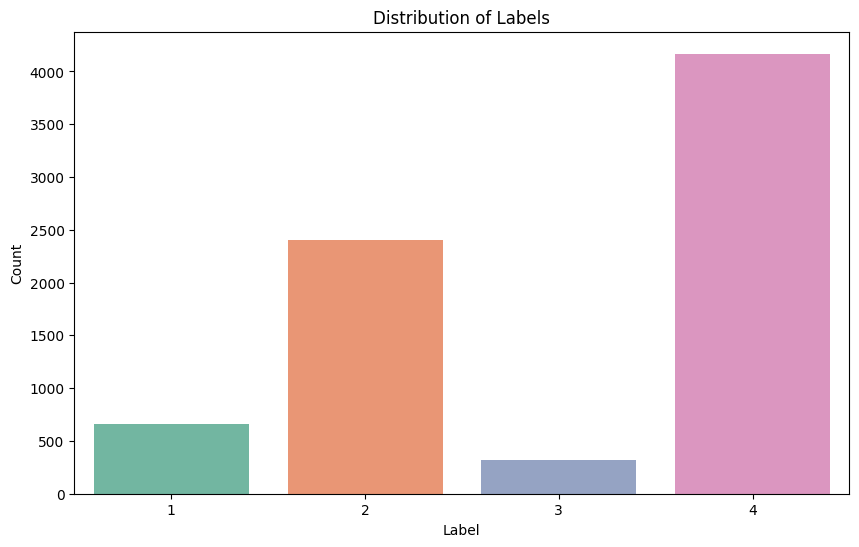

In [30]:

# Basic statistics of labels
label_counts = df['Label'].value_counts()
print(f"Label counts:\n{label_counts}")
# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df, palette='Set2')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


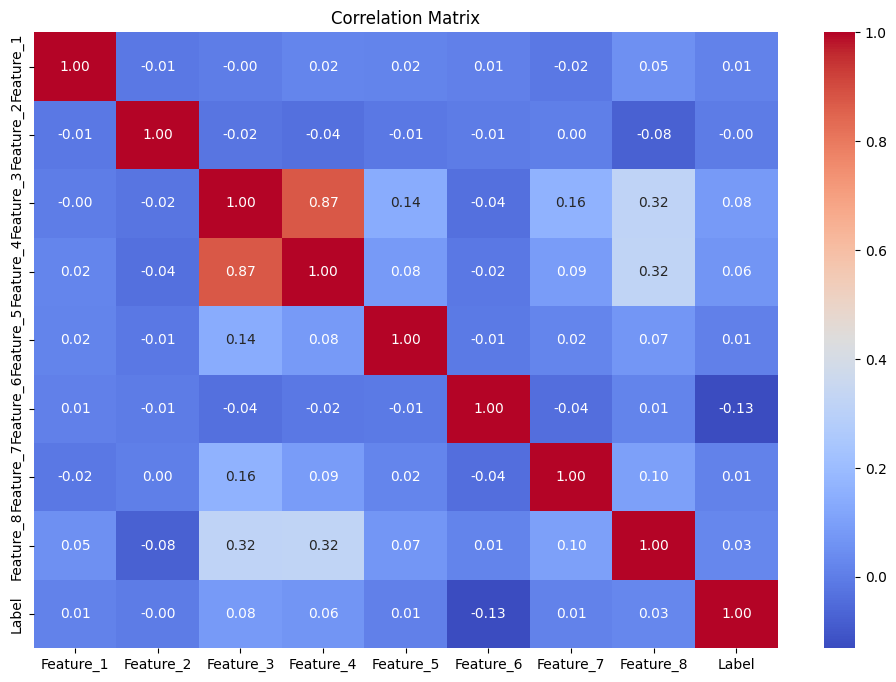

In [33]:
# Correlation between labels and features
# Exclude 'File' column for correlation calculation
correlation_matrix = df.drop(columns=['File']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

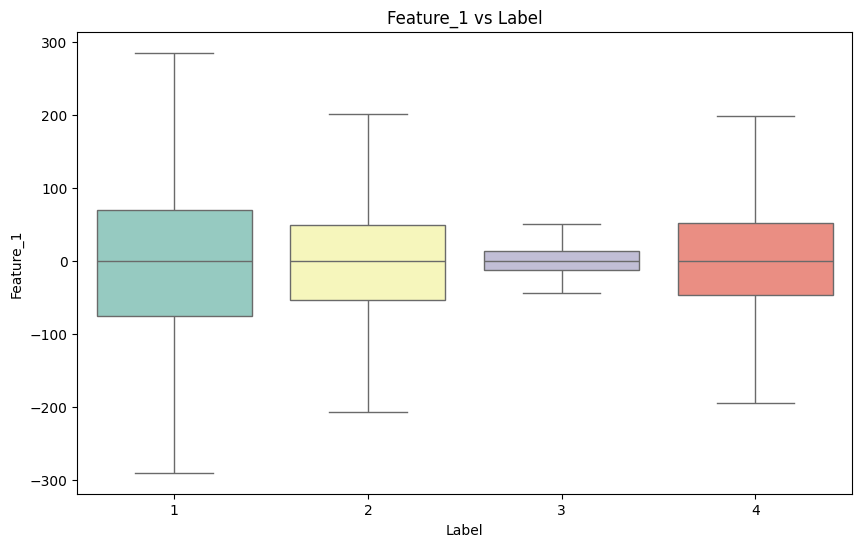

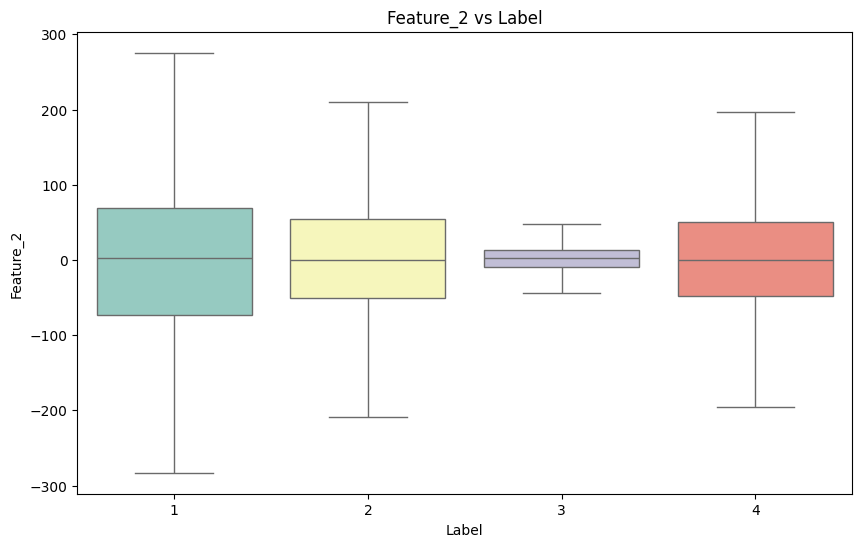

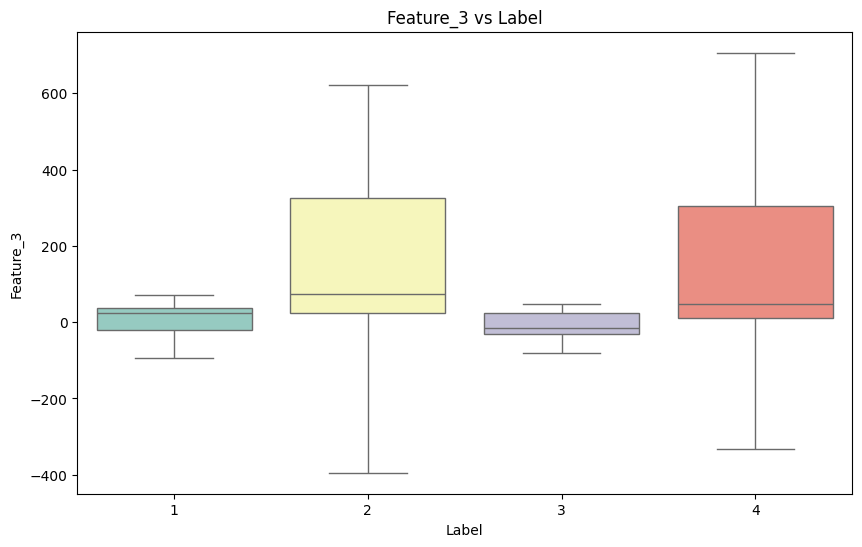

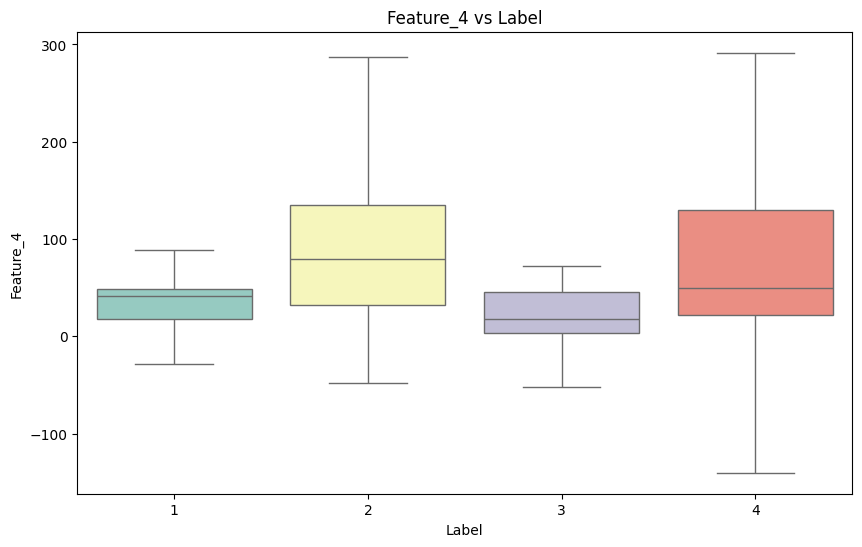

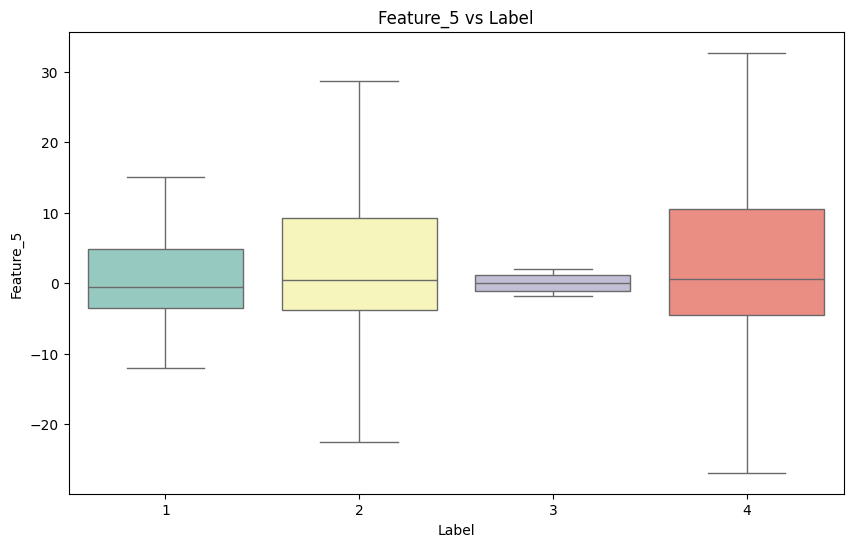

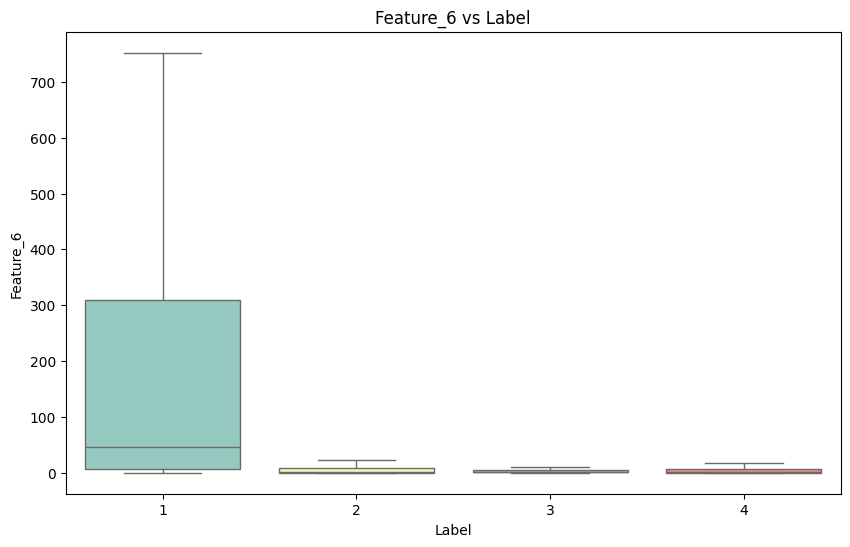

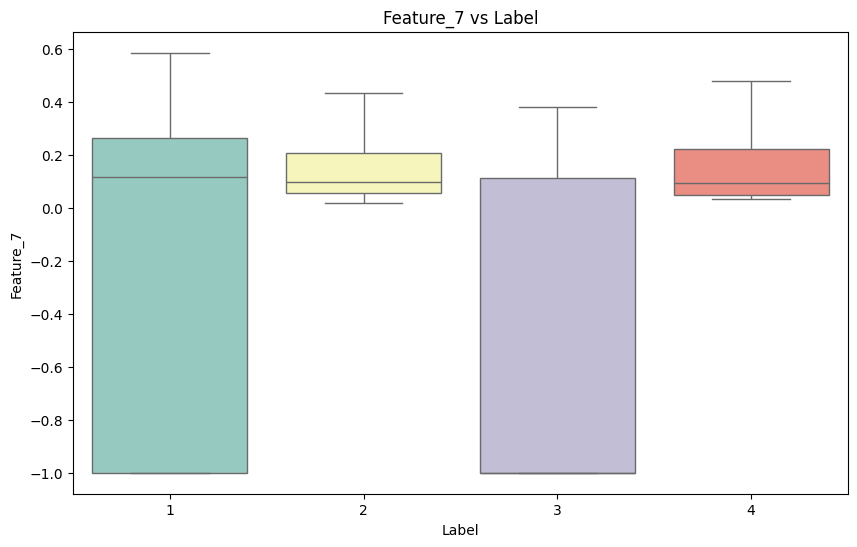

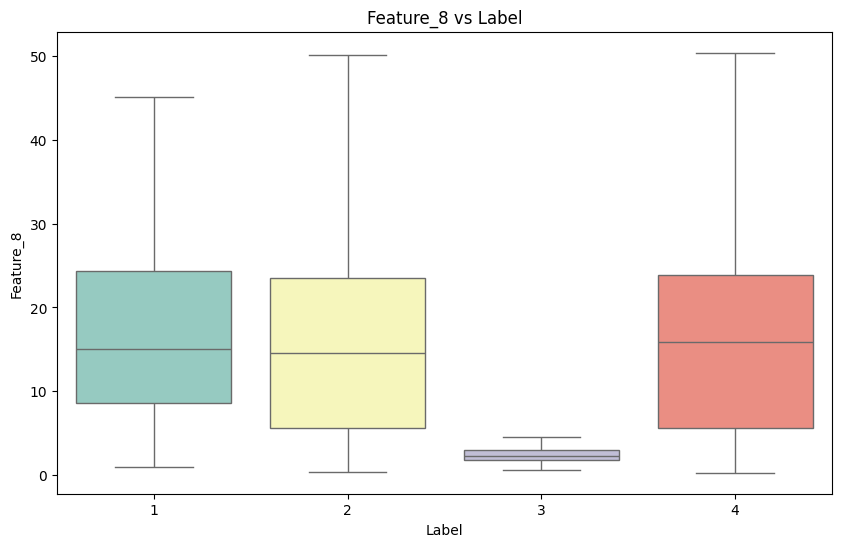

In [39]:
# Plot features against labels
for feature in df.columns[:-2]:  # Exclude 'Label' and 'File' columns
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Label', y=feature, data=df, hue='Label', palette='Set3', showfliers=False, legend=False)
    plt.title(f'{feature} vs Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.show()

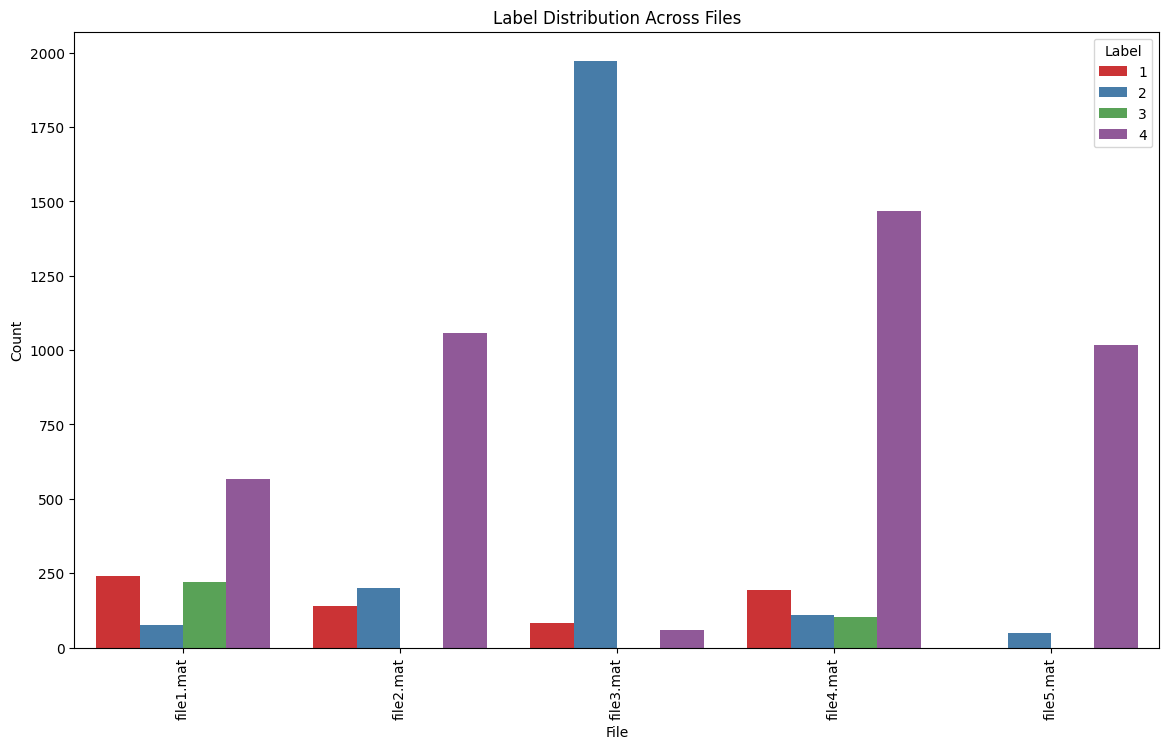

In [36]:
# Analyze label distribution across files
plt.figure(figsize=(14, 8))
sns.countplot(x='File', hue='Label', data=df, palette='Set1')
plt.title('Label Distribution Across Files')
plt.xlabel('File')
plt.ylabel('Count')
plt.legend(title='Label')
plt.xticks(rotation=90)
plt.show()

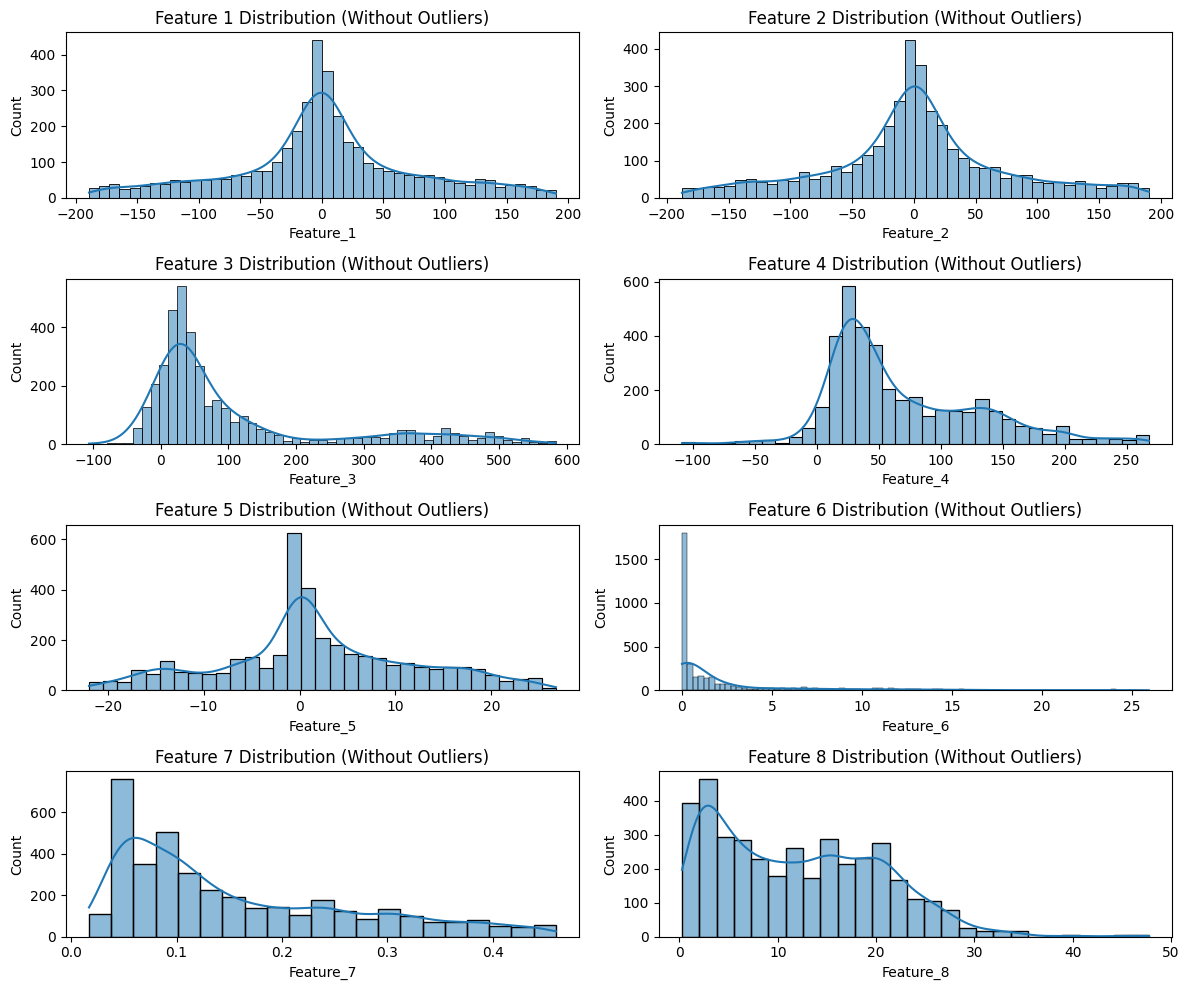

In [8]:
# Calculate the IQR for each feature and remove outliers
def remove_outliers(df, feature_columns):
    clean_df = df.copy()
    for col in feature_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

# List of feature columns
feature_columns = [f'Feature_{i}' for i in range(1, num_features+1)]

# Remove outliers from the dataset
df_clean = remove_outliers(df, feature_columns)

# Visualization of the distribution of each feature without outliers
plt.figure(figsize=(12, 10))
for i in range(1, num_features+1):
    plt.subplot(4, 2, i)
    sns.histplot(df_clean[f'Feature_{i}'], kde=True)
    plt.title(f'Feature {i} Distribution (Without Outliers)')
plt.tight_layout()
plt.show()

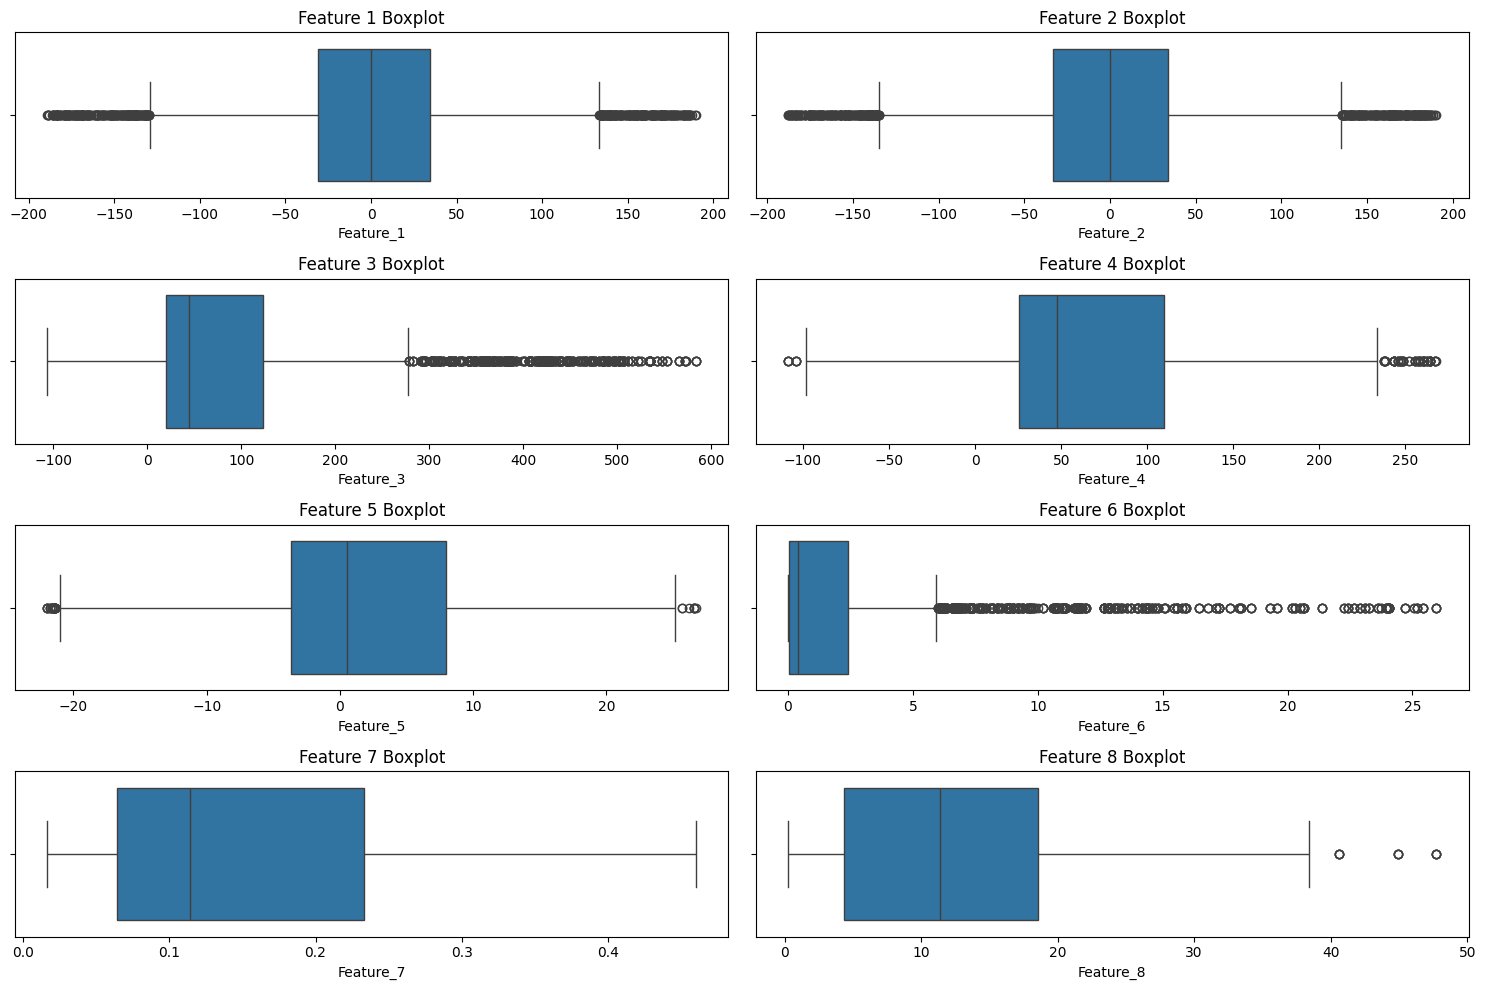

In [9]:
# Boxplots to identify outliers with flipped axes
plt.figure(figsize=(15, 10))
for i in range(1, num_features + 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_clean[f'Feature_{i}'])
    plt.title(f'Feature {i} Boxplot')
plt.tight_layout()
plt.show()

In [10]:

# Z-score to identify outliers
z_scores = np.abs((data - data.mean(axis=0)) / data.std(axis=0))
outliers = np.where(z_scores > 3)
print(f"Number of outliers: {len(outliers[0])}")

Number of outliers: 354


In [11]:
# Group by file and calculate statistics
feature_columns = [f"Feature_{i}" for i in range(1, 9)]
grouped = df.groupby('File')[feature_columns].agg(['mean', 'std', 'min', 'max'])

grouped.T

File               file1.mat    file2.mat     file3.mat     file4.mat  \
Feature_1 mean      8.884491     0.858208     -3.996832     -0.542201   
          std     233.378822   151.094485    115.965463    111.942239   
          min   -2233.352219 -1967.880009   -632.233296   -421.100509   
          max    3668.821647  1448.433480    647.667111    496.241387   
Feature_2 mean     -1.537368     0.136019      3.501798      0.577887   
          std     234.611538   159.273274    118.307575    107.147268   
          min   -3733.913083 -1465.284110   -543.983119   -408.367233   
          max    2190.552276  2072.970891    536.525868    489.304387   
Feature_3 mean     -5.515042   143.574833    170.023494    133.492978   
          std     264.774893   271.345185    214.949474    170.401671   
          min    -487.967214   -37.616758   -394.801637   -106.050565   
          max    2409.284791  2214.278700   1807.271087    937.645147   
Feature_4 mean     29.500860    93.114106     91.633497     87.869600   
          std     267.846602   207.525171    130.612583     86.906216   
          min    -363.110212   -98.495081   -342.277767    -67.825447   
          max    2482.909020  1965.232692   1649.906206    523.321565   
Feature_5 mean      0.858688     1.560668      2.203370      1.649905   
          std       7.255064    13.091959     13.966897     12.092961   
          min     -28.883850   -35.423926    -38.227502    -34.978638   
          max      34.723130    35.282780     47.198136     28.525715   
Feature_6 mean    284.864833    52.838146    132.699453    177.606988   
          std    2451.306824   364.473055   1077.659697   1060.230598   
          min       0.000004     0.001166      0.000710      0.000990   
          max   36643.729911  6114.827637  18872.105469  16688.906250   
Feature_7 mean     -1.000000     0.179456      0.158771      0.172101   
          std       0.000000     0.141759      0.142758      0.128861   
          min      -1.000000     0.030946     -1.000000      0.031306   
          max      -1.000000     0.633087      0.628311      0.632781   
Feature_8 mean     11.191794    17.685072     16.209729     15.028217   
          std      21.554825    16.563674     12.120287     10.551430   
          min       0.398046     0.584176      0.679300      0.374843   
          max     237.082889   163.254776     70.197960     60.688779   

File             file5.mat  
Feature_1 mean    7.412043  
          std   113.807973  
          min  -427.023949  
          max   366.949275  
Feature_2 mean   -1.608011  
          std   114.875074  
          min  -302.406943  
          max   427.596448  
Feature_3 mean  170.135194  
          std   179.453600  
          min   -48.012390  
          max   620.657988  
Feature_4 mean  100.816203  
          std    85.616994  
          min  -108.726415  
          max   376.772547  
Feature_5 mean    0.264757  
          std    16.219510  
          min   -63.846908  
          max    29.797243  
Feature_6 mean   10.892360  
          std    41.423376  
          min     0.000476  
          max   505.794067  
Feature_7 mean    0.167634  
          std     0.140257  
          min     0.034154  
          max     0.705147  
Feature_8 mean   19.029380  
          std    11.352849  
          min     0.253933  
          max    65.709169

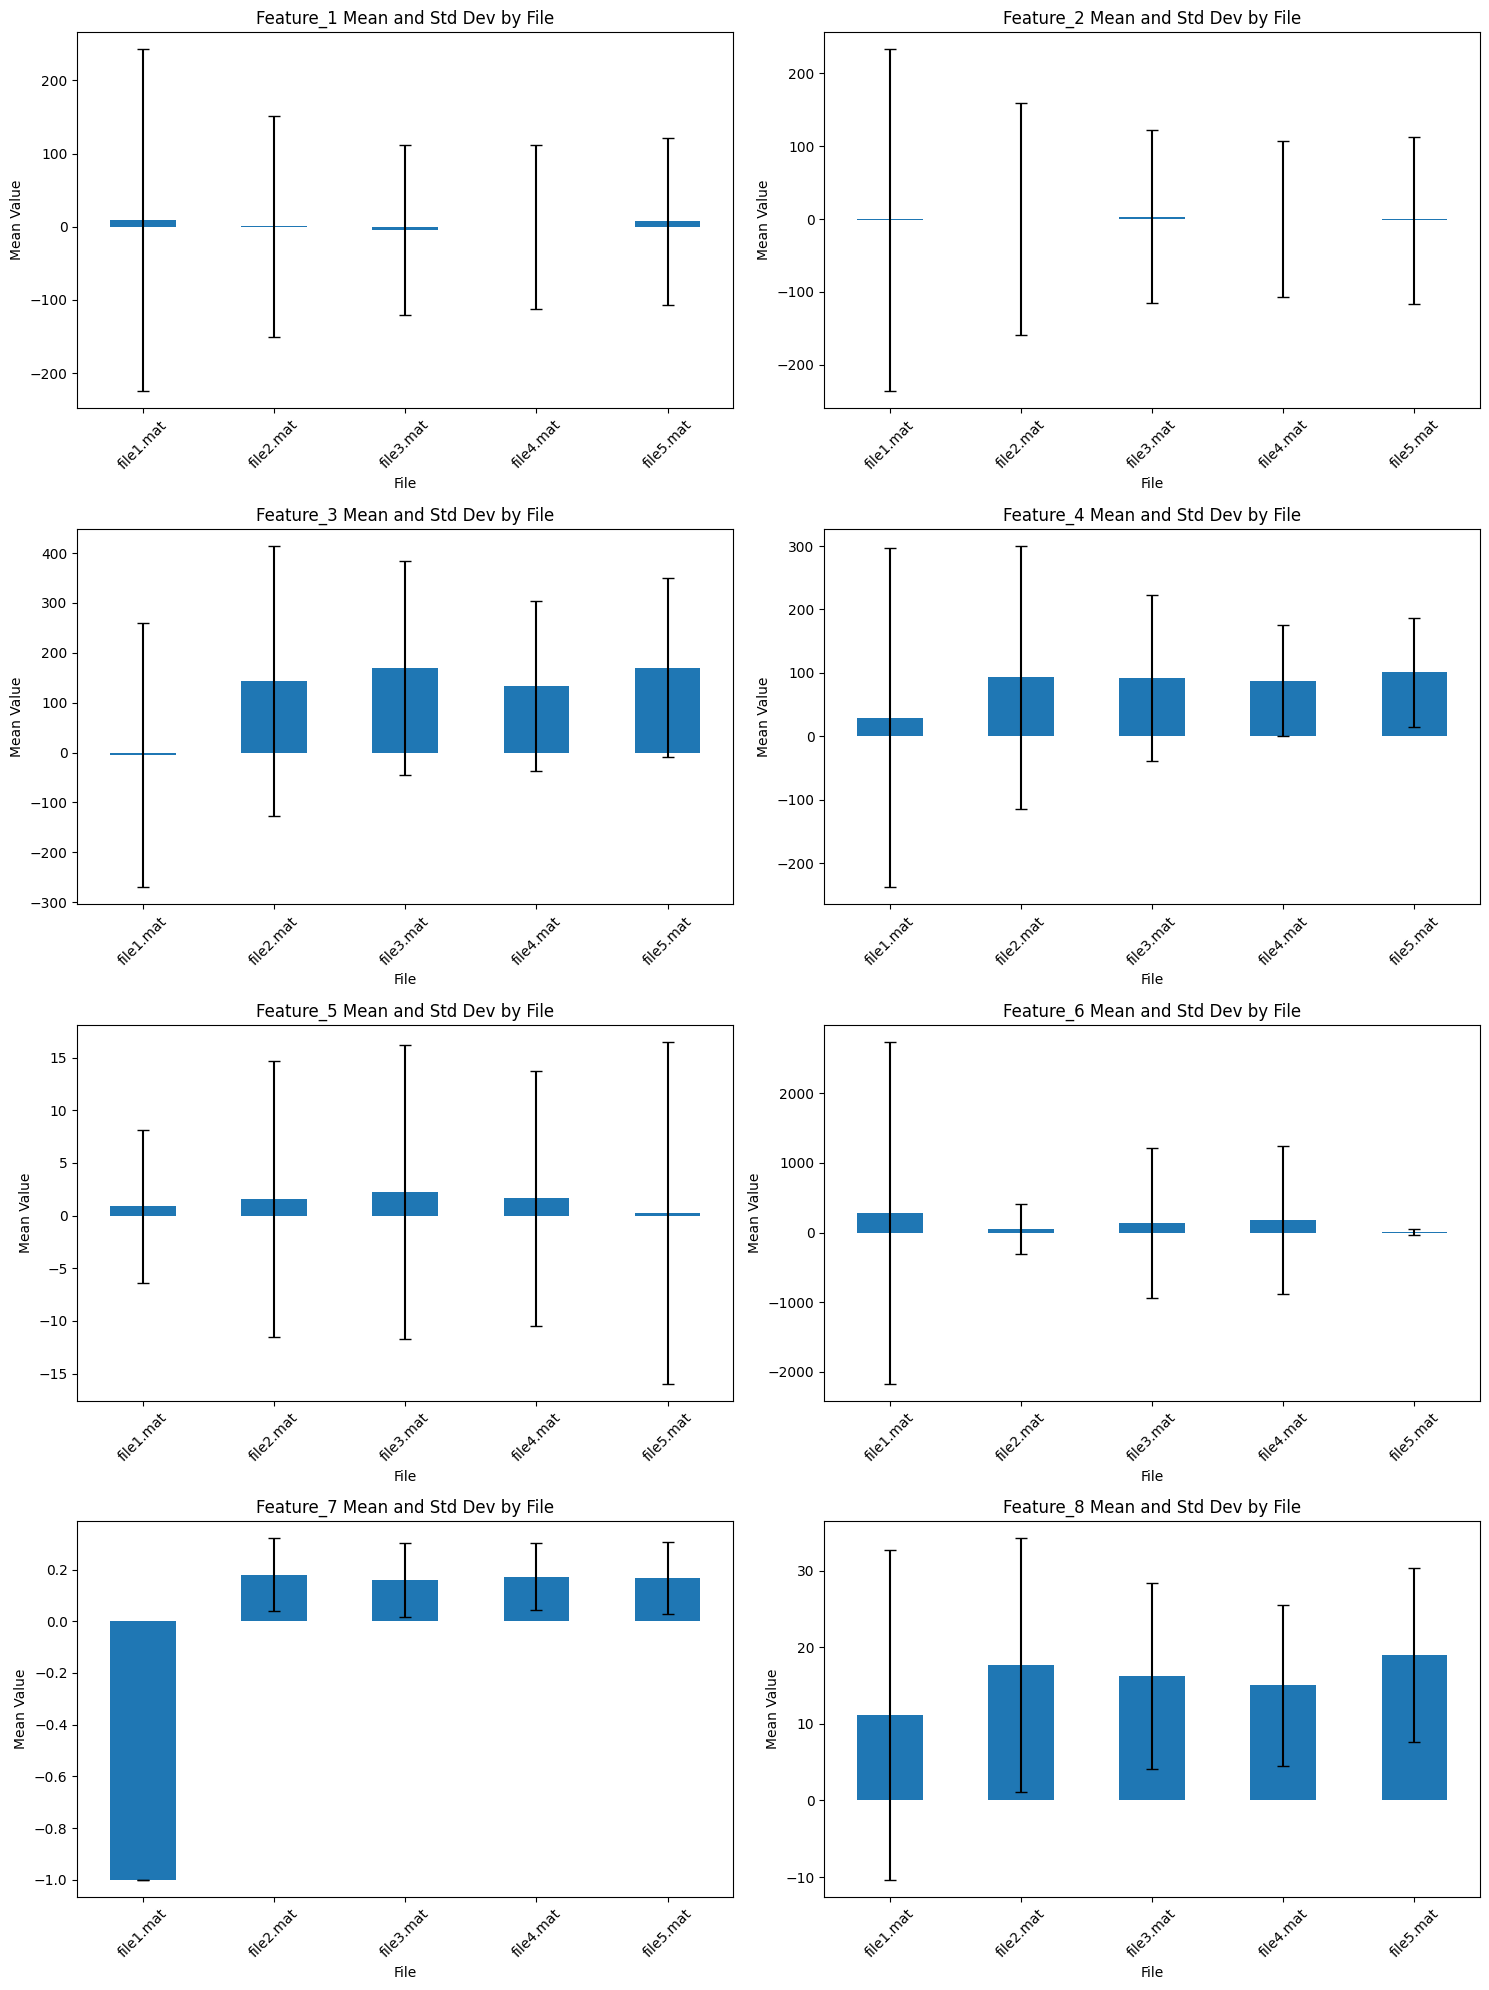

In [12]:
# Create subplots for the mean and standard deviation of each feature by file
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(feature_columns):
    ax = axes[i]
    grouped[feature].plot(kind='bar', y='mean', yerr='std', capsize=4, legend=False, ax=ax)
    ax.set_title(f'{feature} Mean and Std Dev by File')
    ax.set_ylabel('Mean Value')
    ax.set_xlabel('File')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Time series 

Colored by File

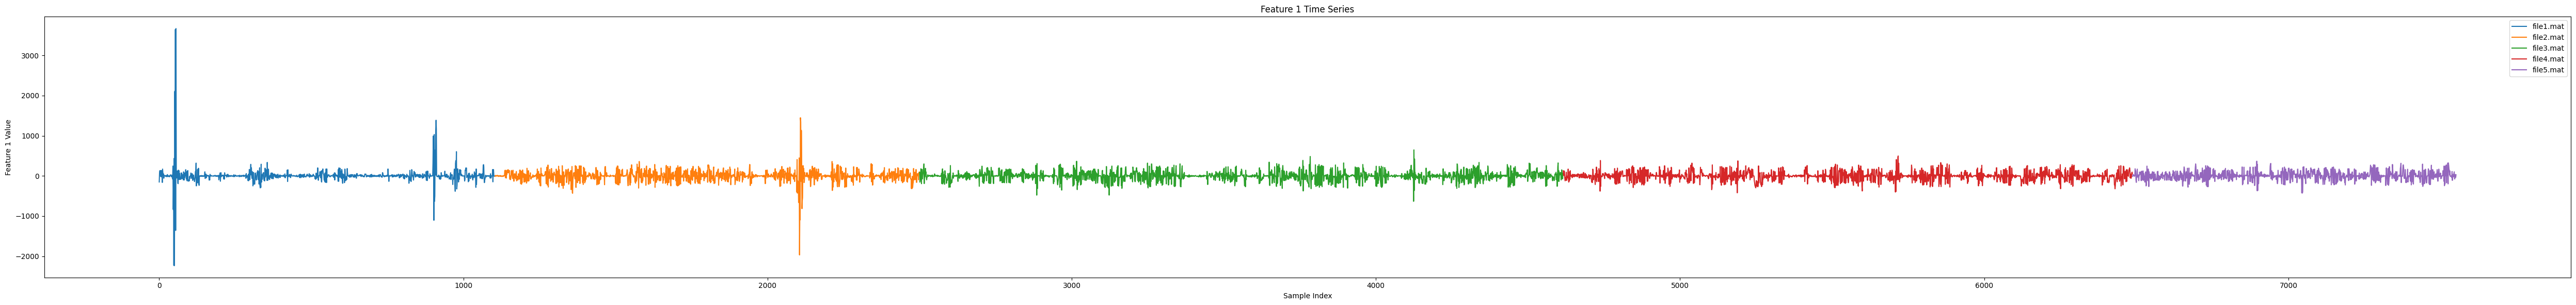

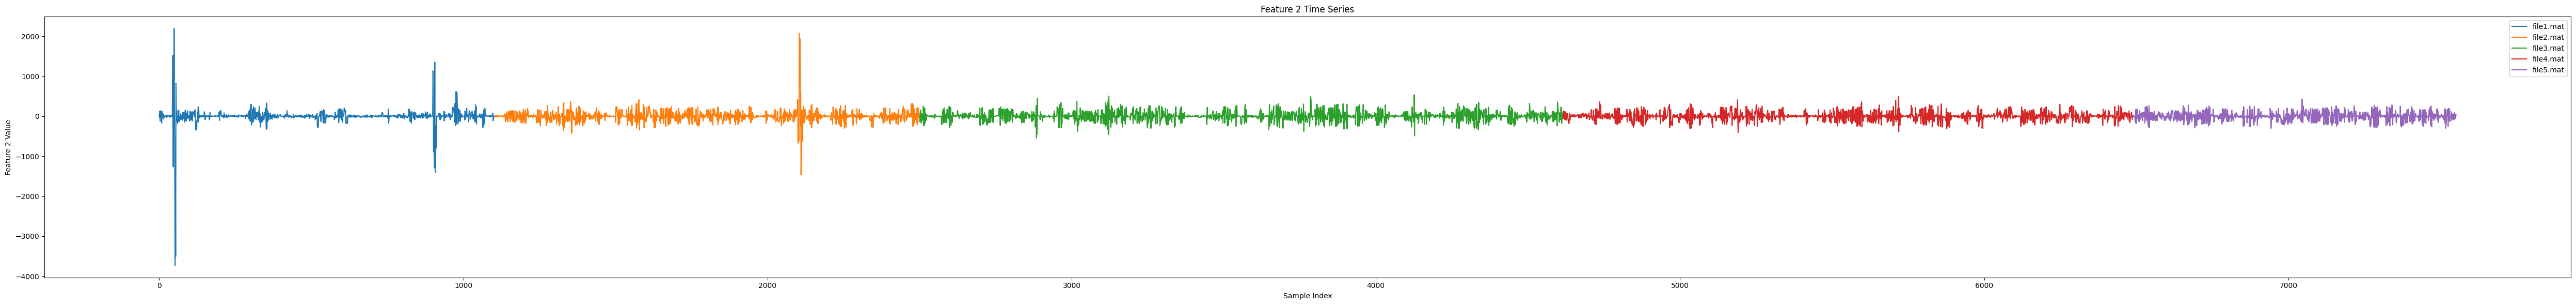

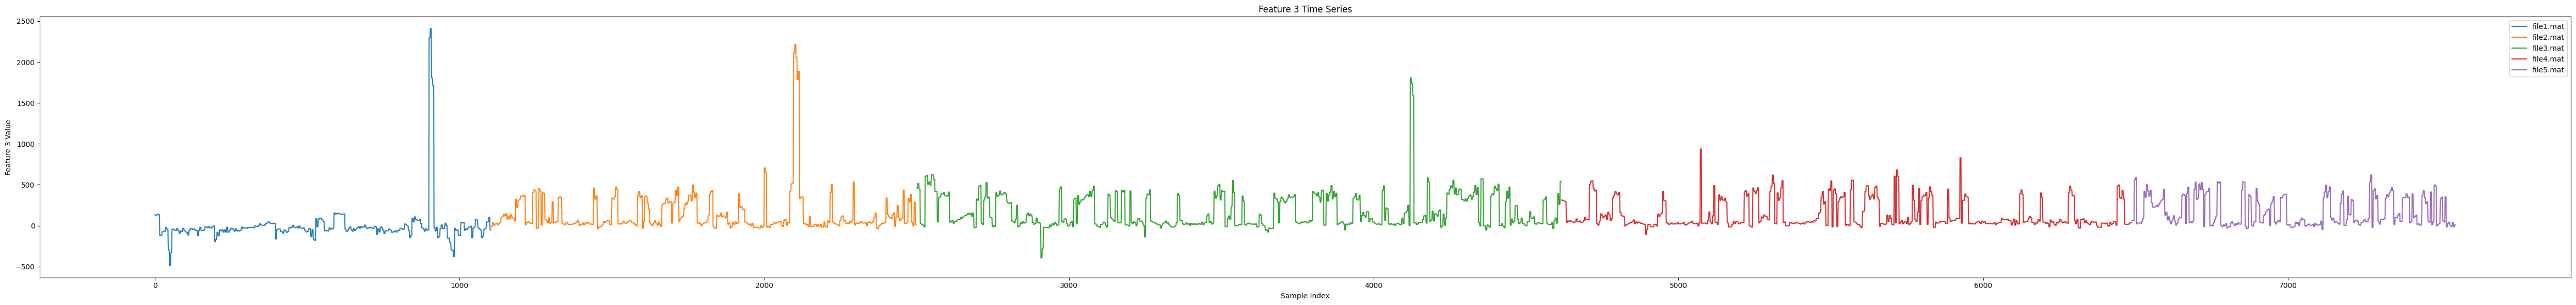

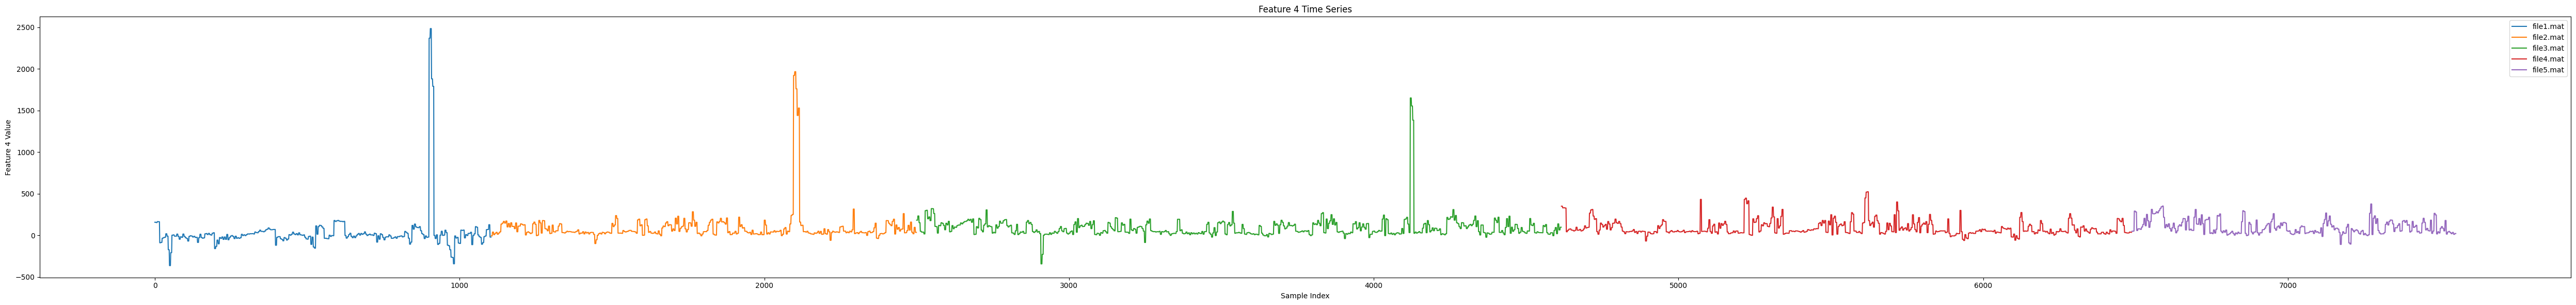

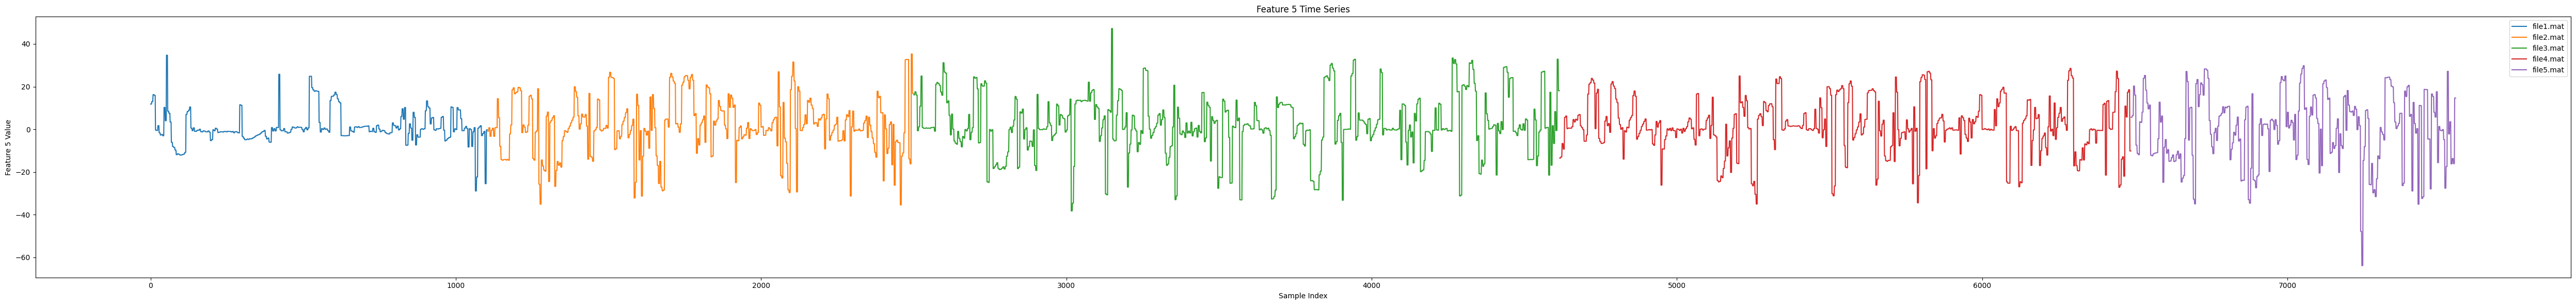

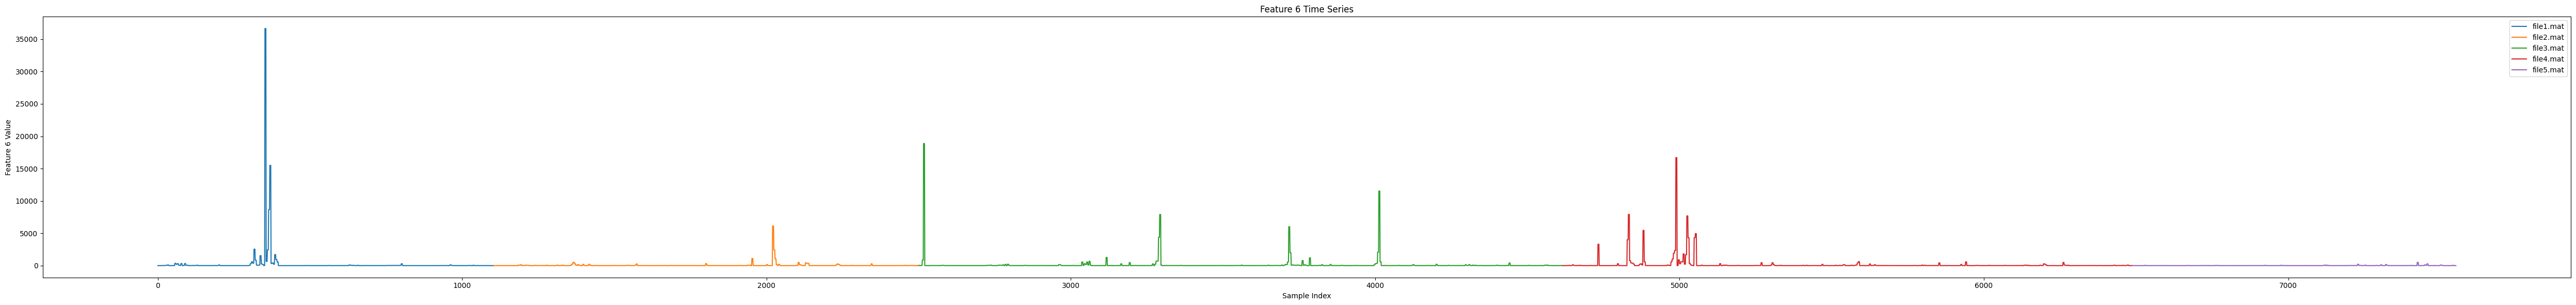

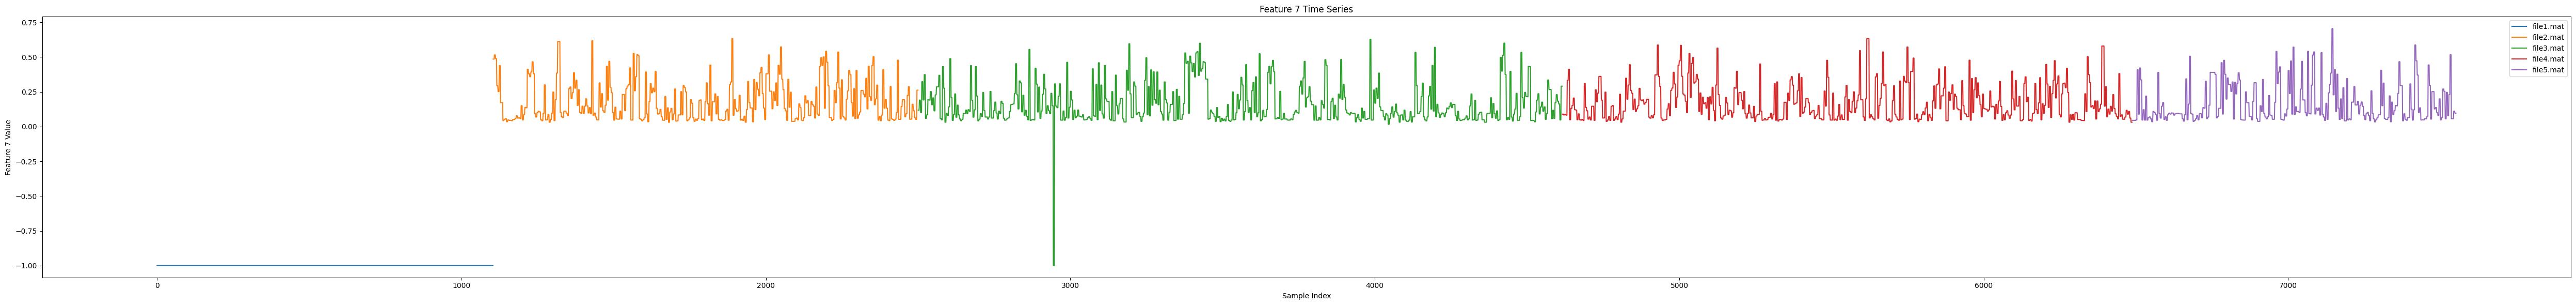

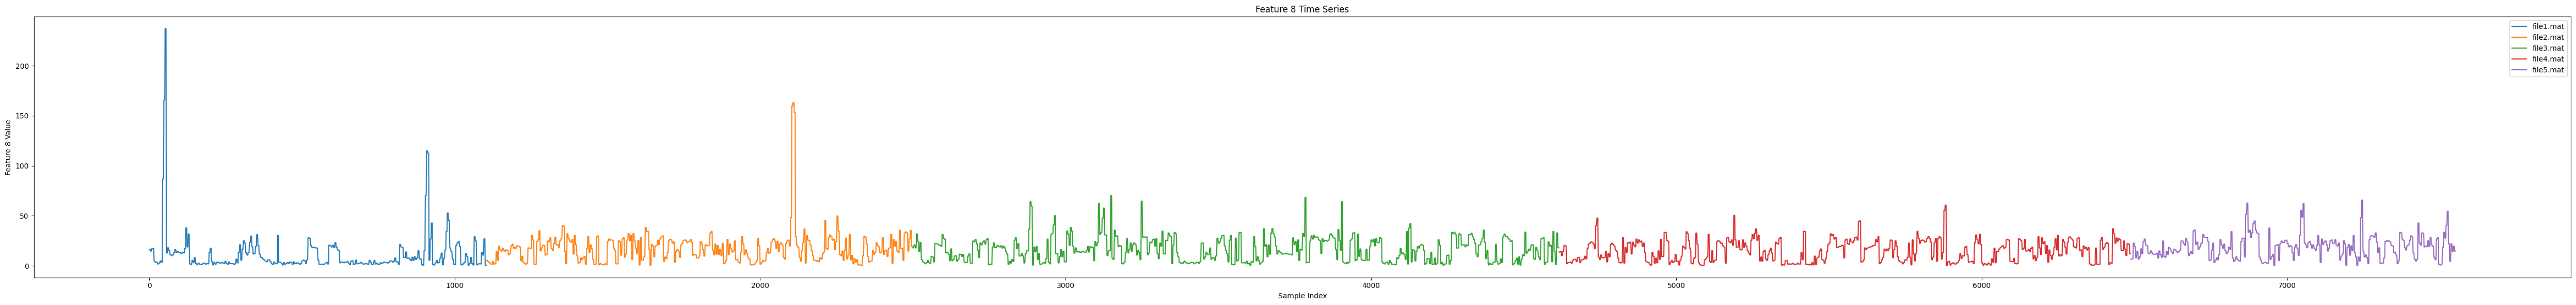

In [13]:
# Create the directory to save the plots if it doesn't exist
output_dir = 'features_time_series'
os.makedirs(output_dir, exist_ok=True)

# Plot each feature as a time series and save the plots
for i in range(1, num_features + 1):
    plt.figure(figsize=(50, 6))
    for file_name in df['File'].unique():
        file_data = df[df['File'] == file_name]
        plt.plot(file_data.index, file_data[f'Feature_{i}'], label=file_name)
    plt.title(f'Feature {i} Time Series')
    plt.xlabel('Sample Index')
    plt.ylabel(f'Feature {i} Value')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'Feature_{i}_Time_Series.png'))
    plt.show()
    plt.close()  # Close the plot to free up memory

Colored by Label

In [14]:
# Define the number of features
num_features = data.shape[1]
feature_columns = [f"Feature_{i}" for i in range(1, num_features + 1)]

# Initialize a dictionary to store the first and last values for each feature by file
first_last_values = {feature: {'first': [], 'last': [], 'file': []} for feature in feature_columns}

# Iterate through each feature and extract the first and last values for each file
for feature in feature_columns:
    for file_name in df['File'].unique():
        file_data = df[df['File'] == file_name]
        first_value = file_data[feature].iloc[0]
        last_value = file_data[feature].iloc[-1]
        first_last_values[feature]['first'].append(first_value)
        first_last_values[feature]['last'].append(last_value)
        first_last_values[feature]['file'].append(file_name)

# Print the collected first and last values for all features
for feature, values in first_last_values.items():
    print(f"{feature}:")
    for file, first, last in zip(values['file'], values['first'], values['last']):
        print(f"  File: {file} - First Value = {first}, Last Value = {last}")
    print("\n")


Feature_1:
  File: file1.mat - First Value = -151.30314809488561, Last Value = -4.7385395579985925
  File: file2.mat - First Value = -4.164547406663587, Last Value = 96.57235602803621
  File: file3.mat - First Value = 86.52549494501545, Last Value = 69.643427153429
  File: file4.mat - First Value = 126.37110807404997, Last Value = 51.70013185388234
  File: file5.mat - First Value = -11.369112951219336, Last Value = 28.42463642178518


Feature_2:
  File: file1.mat - First Value = -20.12964728364892, Last Value = -2.244297485293373
  File: file2.mat - First Value = 12.33129463274281, Last Value = 15.55571145419367
  File: file3.mat - First Value = -133.6772447918047, Last Value = -56.285426064845524
  File: file4.mat - First Value = -41.283589411577736, Last Value = -79.66442921465773
  File: file5.mat - First Value = -27.972704404452543, Last Value = 39.52099502719511


Feature_3:
  File: file1.mat - First Value = 130.50352618313593, Last Value = -50.901843396009355
  File: file2.mat - 

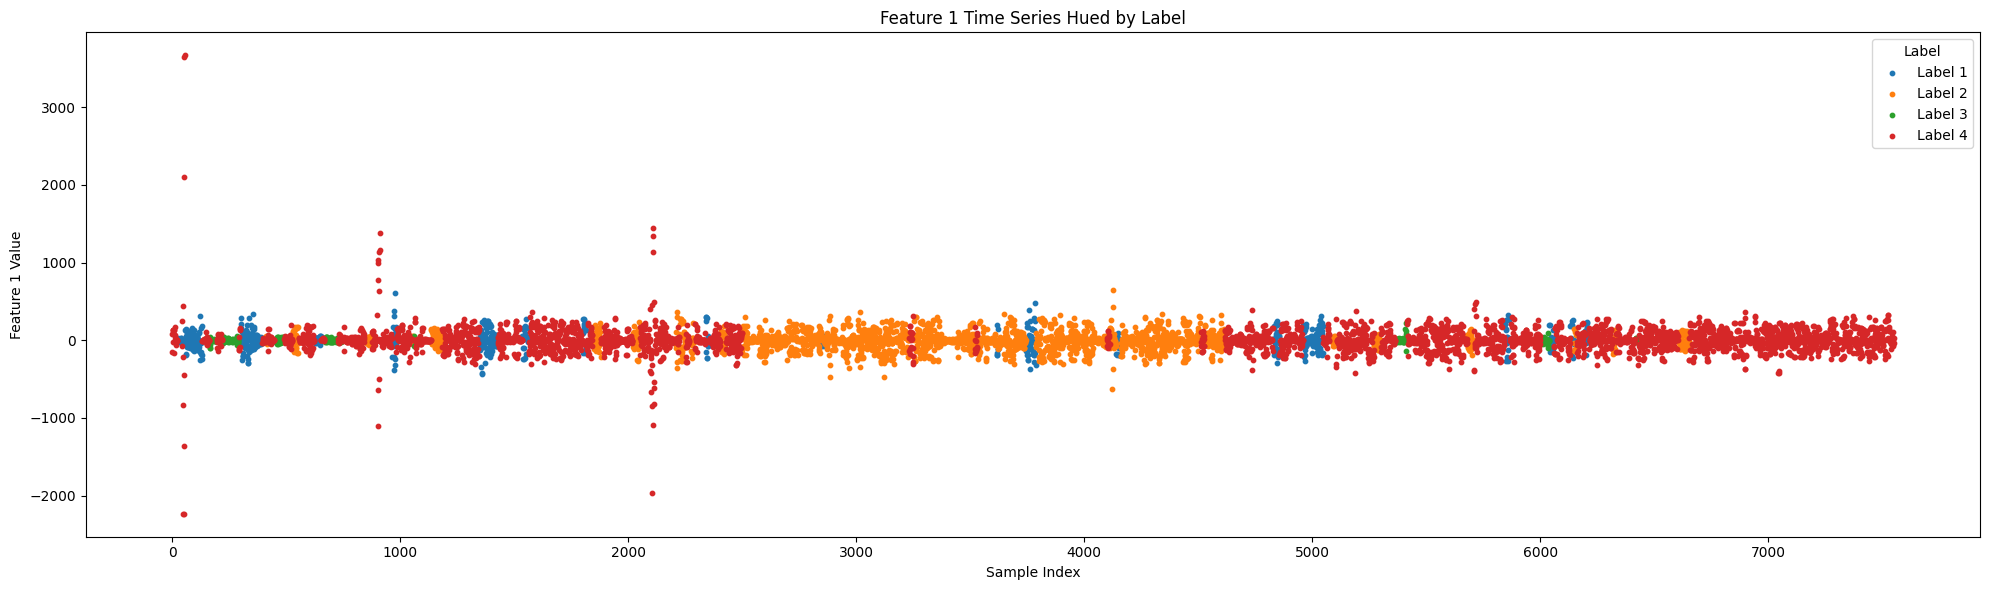

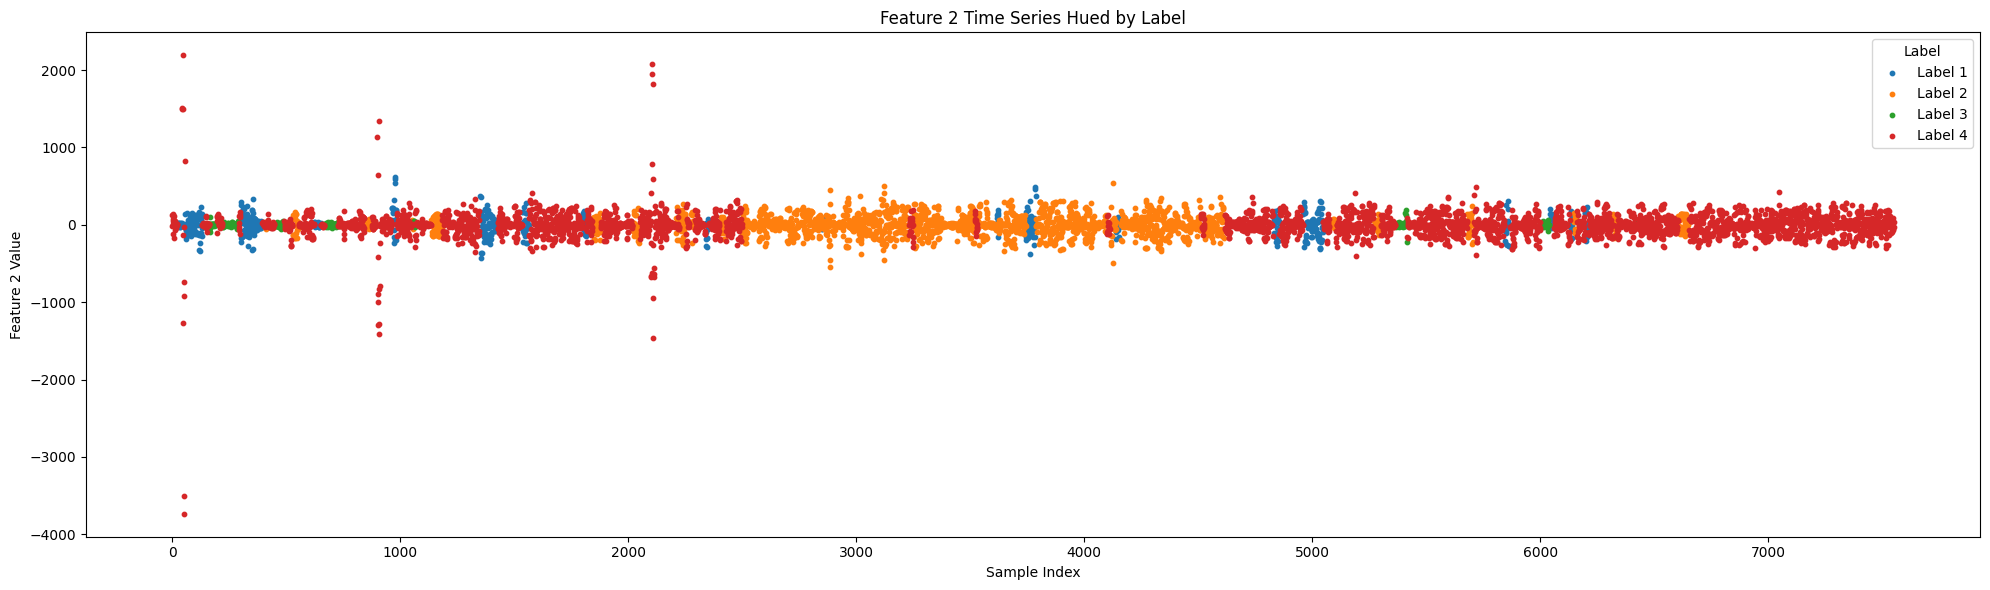

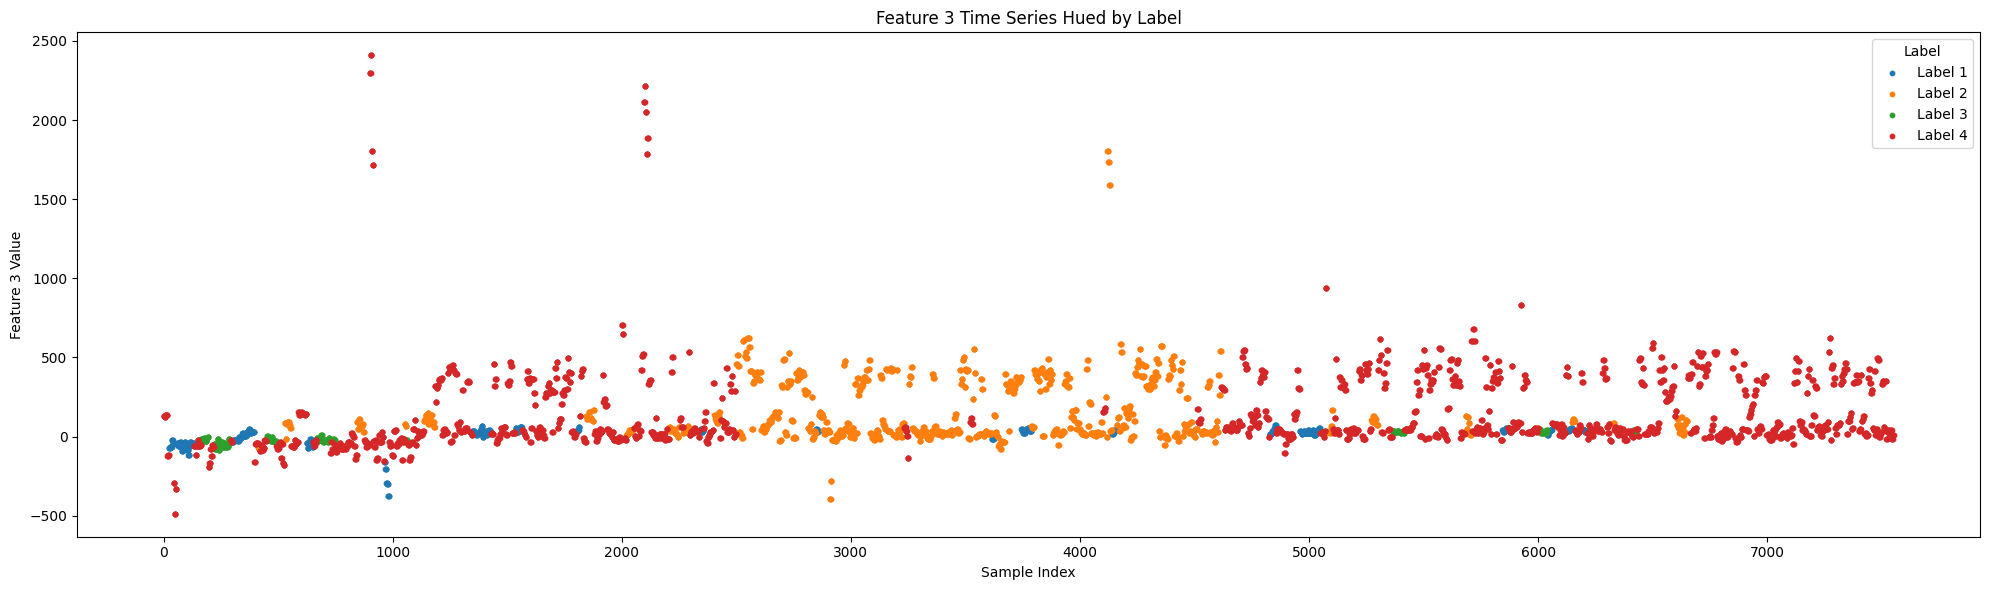

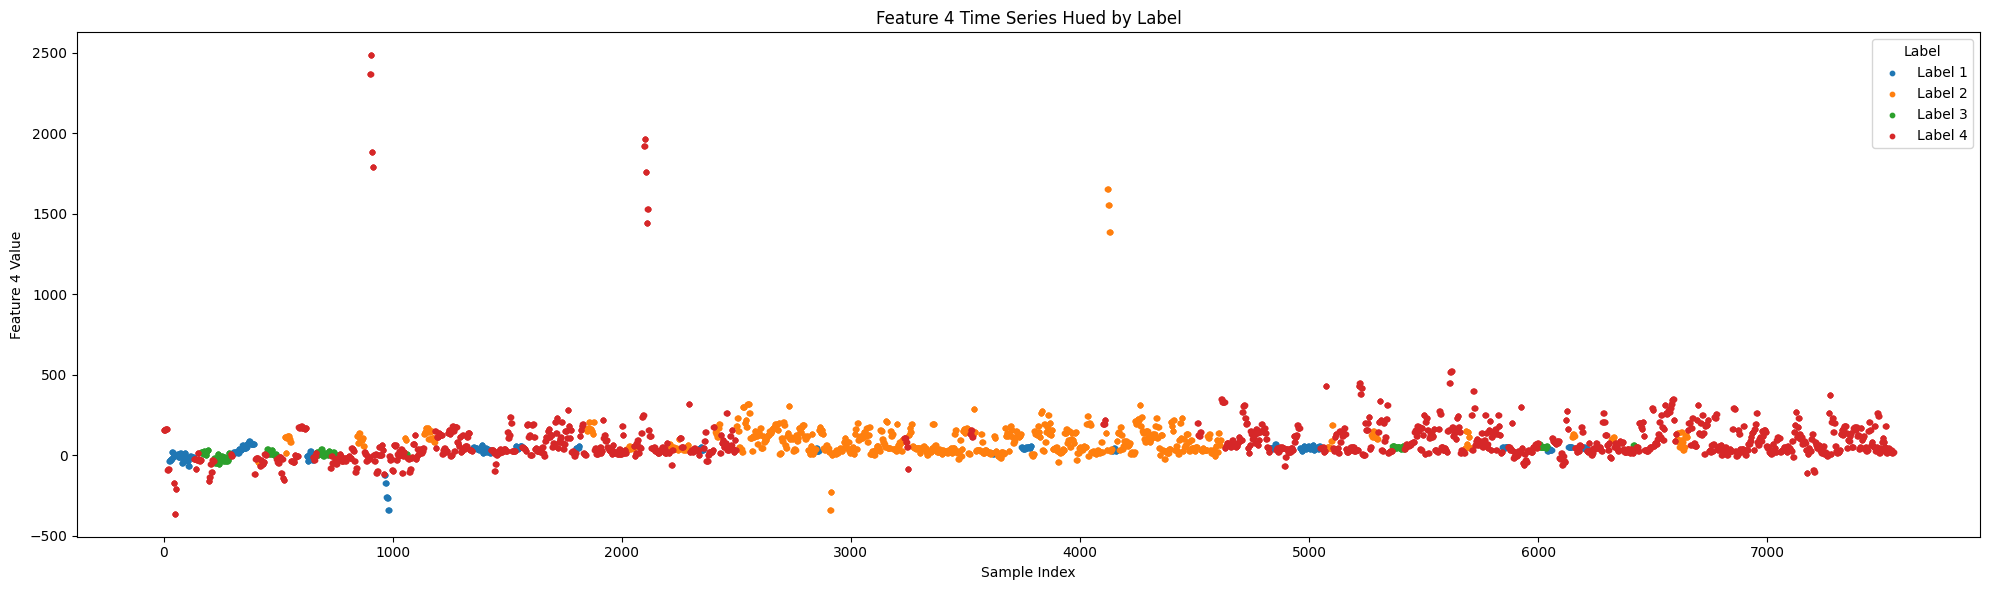

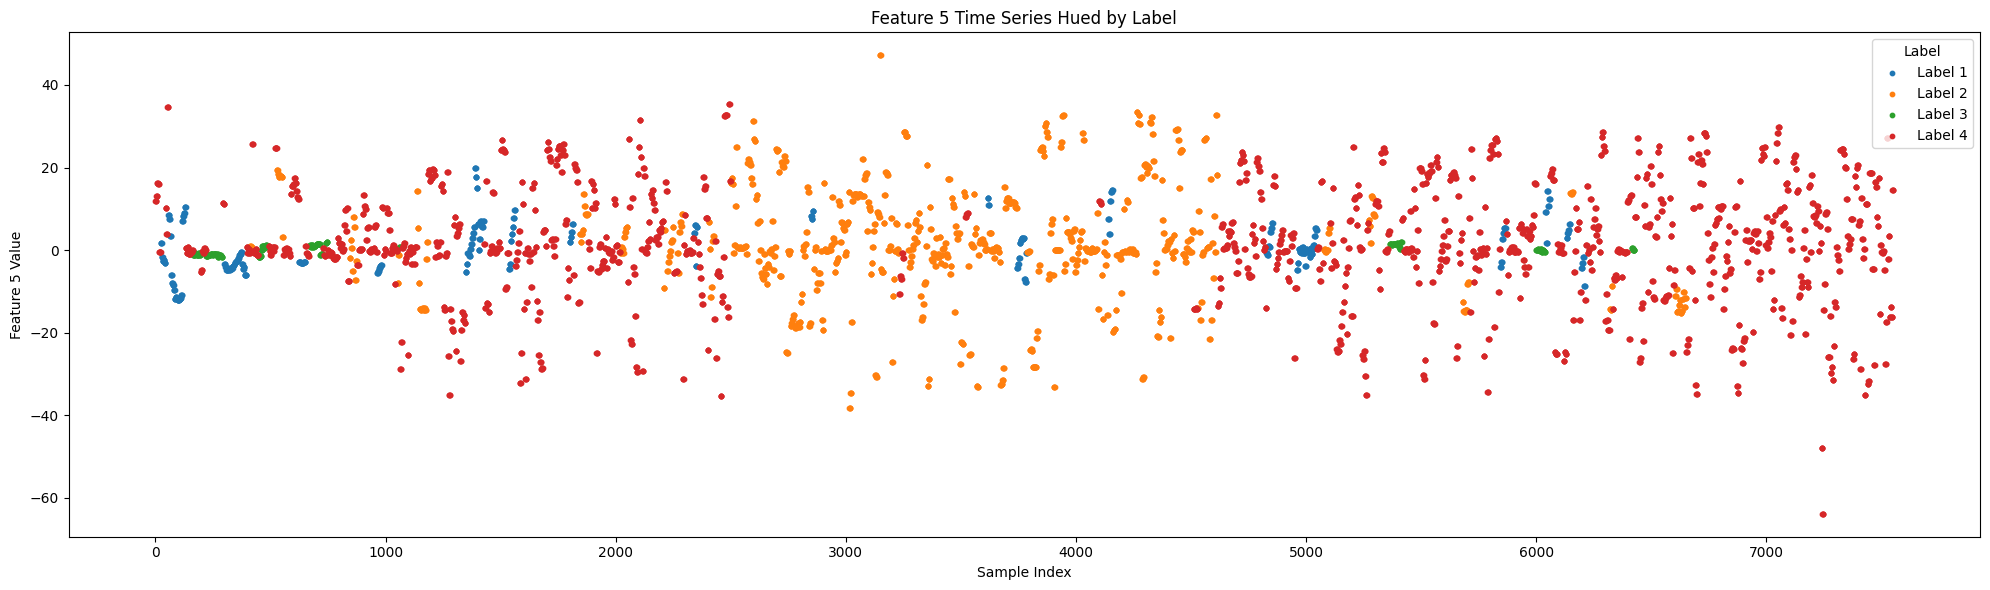

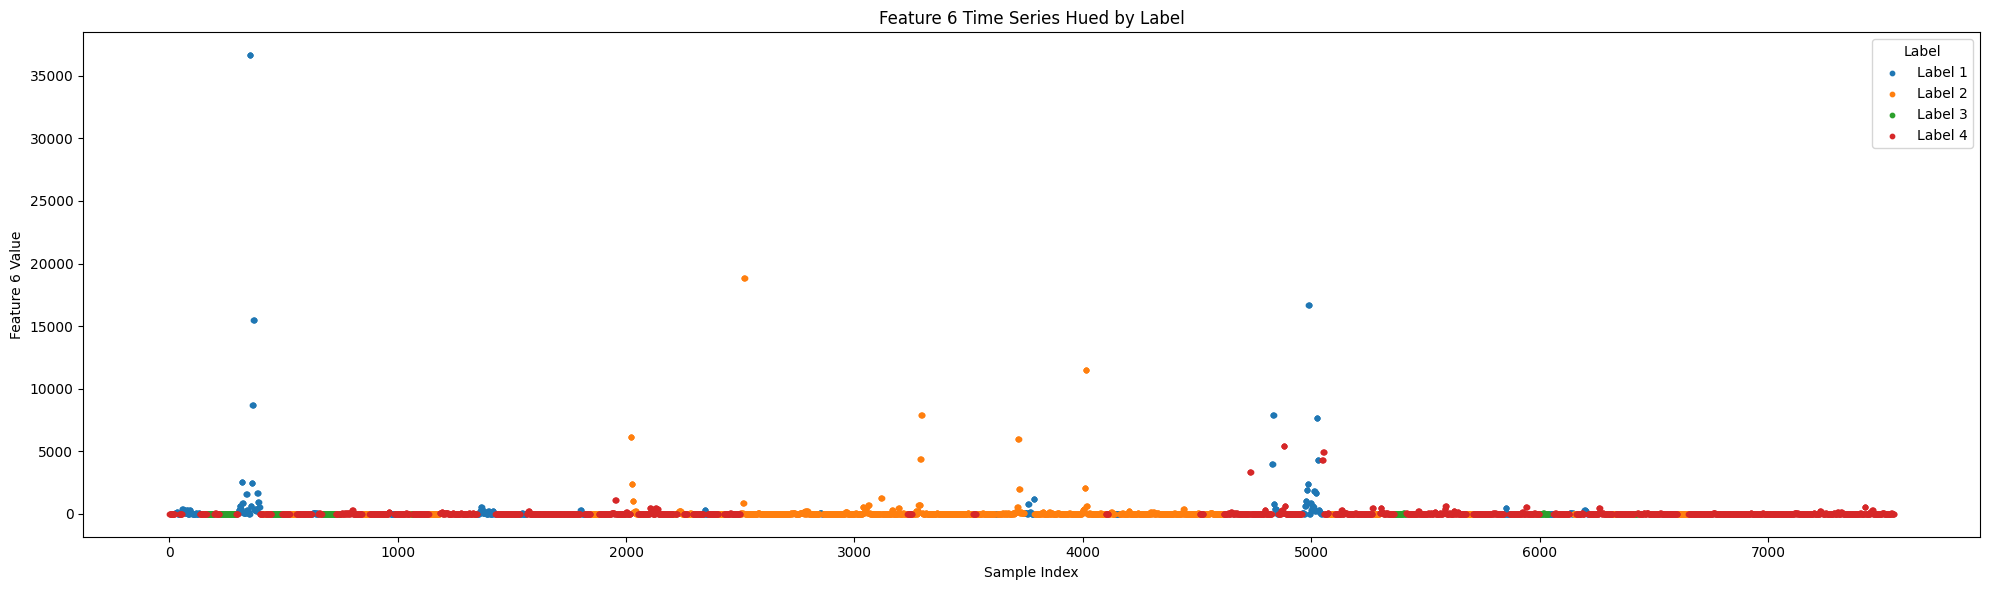

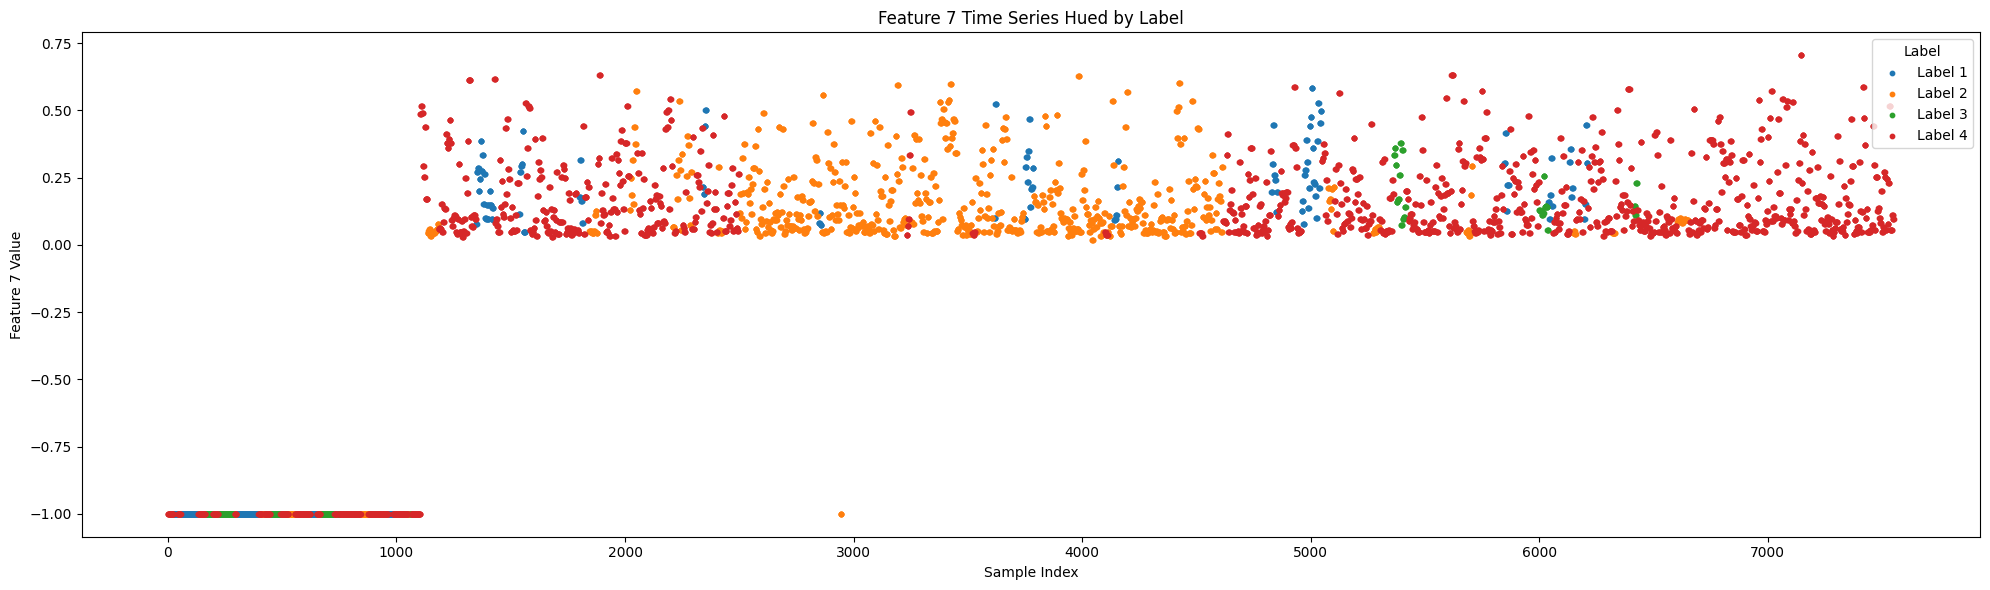

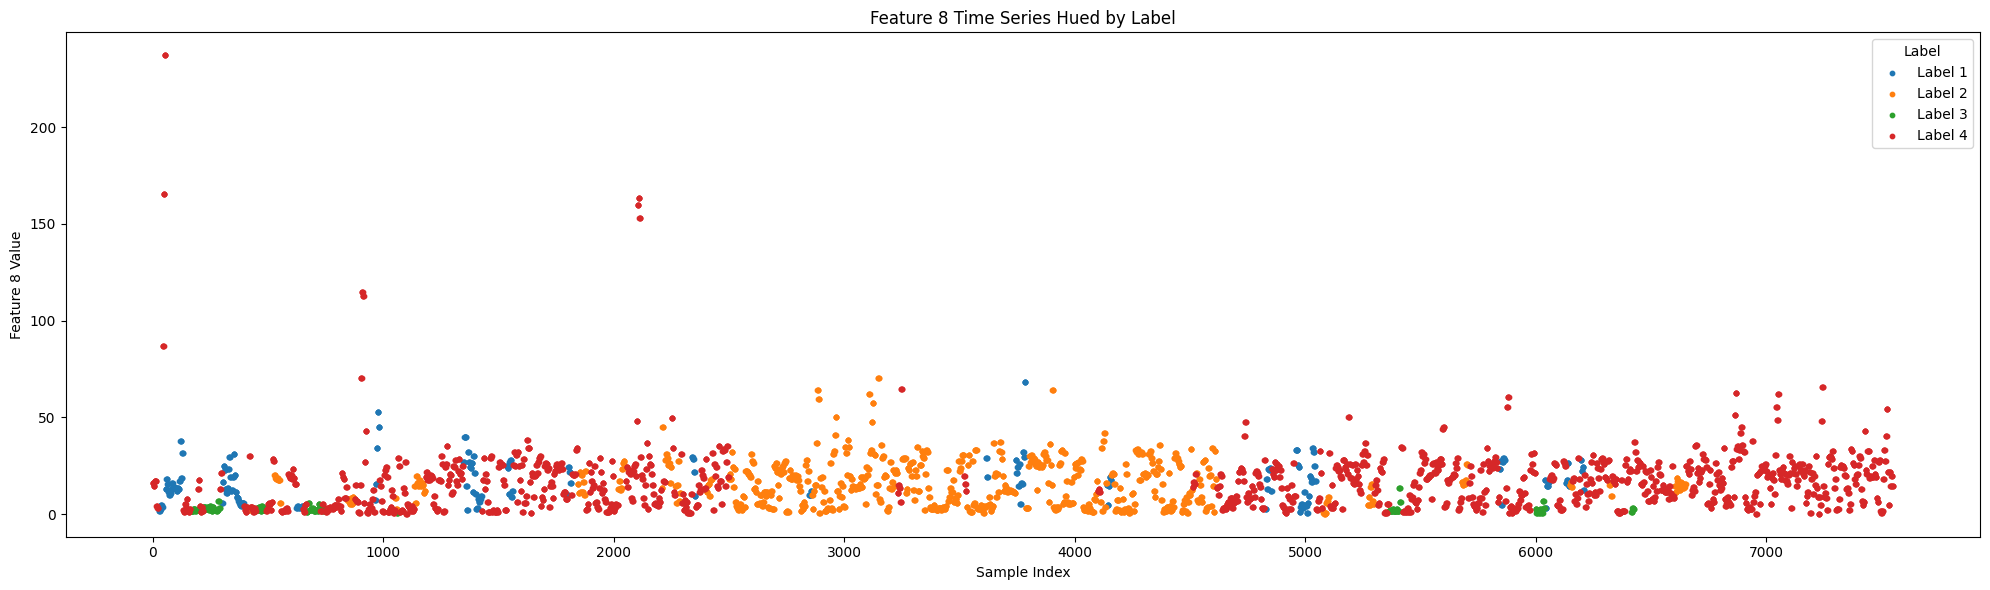

In [15]:
import matplotlib.pyplot as plt

# Define the number of features
num_features = data.shape[1]

# Define a color palette for labels
label_colors = {label: plt.cm.tab10(i) for i, label in enumerate(sorted(df['Label'].unique()))}

# Plot each feature as a time series, hued by label using scatter plot
for i in range(1, num_features + 1):
    plt.figure(figsize=(20, 6))
    for label in sorted(df['Label'].unique()):
        label_data = df[df['Label'] == label]
        plt.scatter(label_data.index, label_data[f"Feature_{i}"], label=f'Label {label}', color=label_colors[label], s=10)
    plt.title(f'Feature {i} Time Series Hued by Label')
    plt.xlabel('Sample Index')
    plt.ylabel(f'Feature {i} Value')
    plt.legend(title='Label', loc='upper right')
    plt.tight_layout()
    plt.show()


## PCA Plotting

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Convert data to DataFrame for easier analysis
data = np.concatenate(dataset.data).reshape(-1, 8)
labels = np.concatenate(dataset.labels).flatten()
files = np.array(dataset.files)

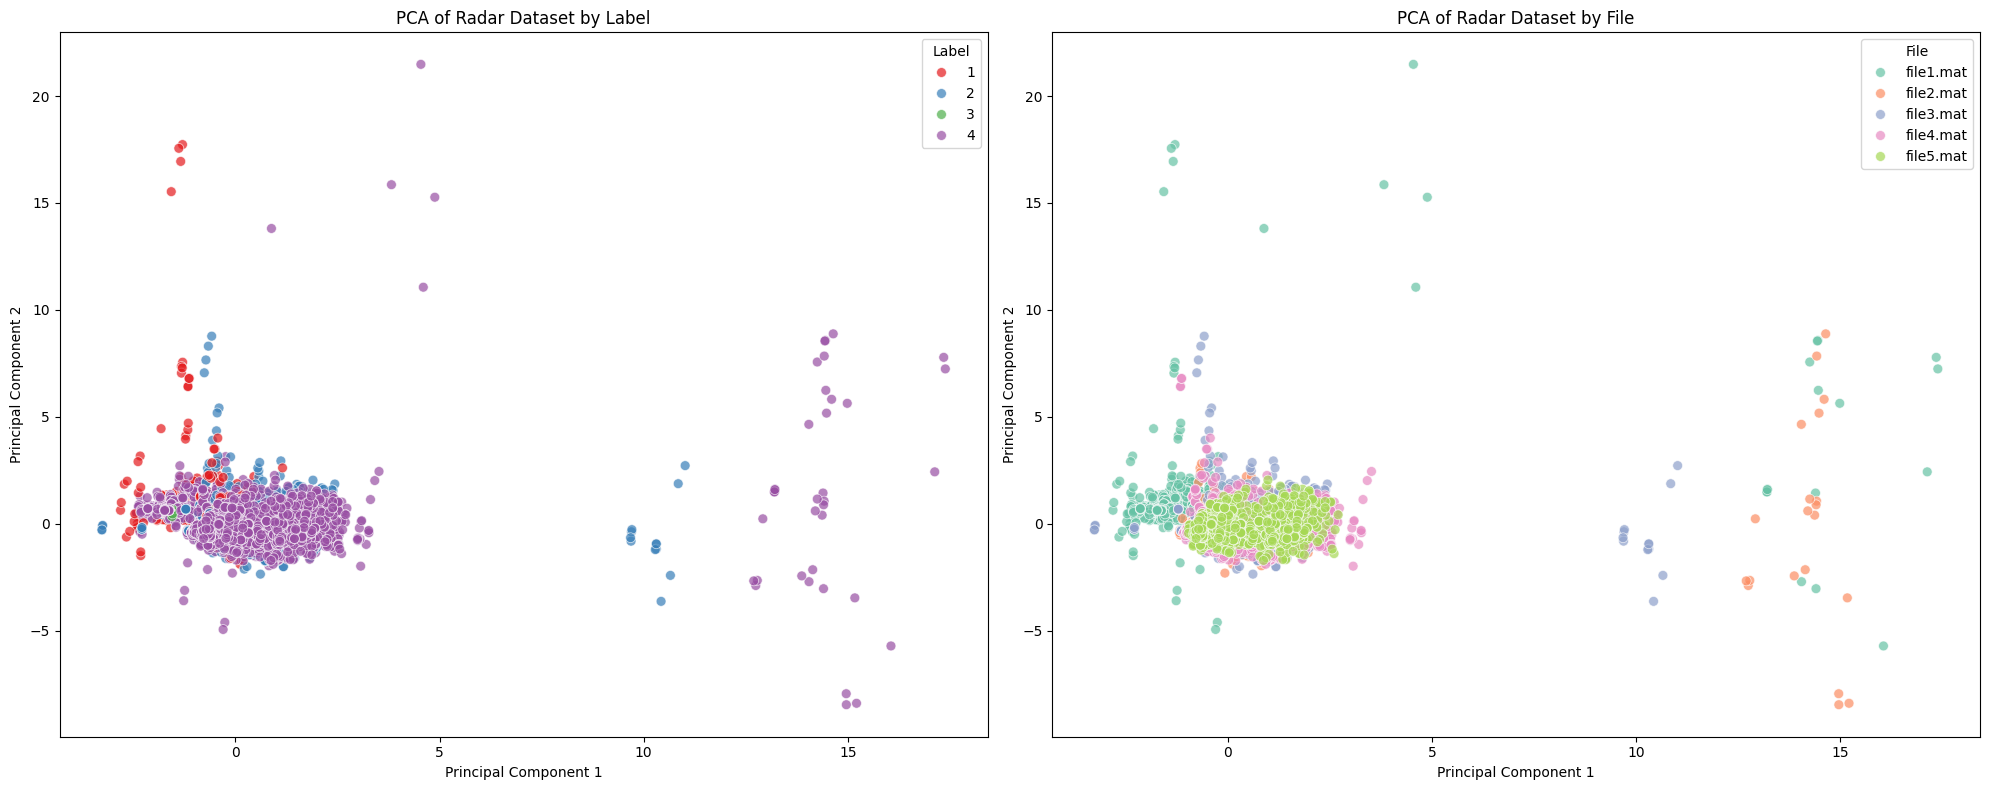

Explained variance by component: [0.26671955 0.13189109]


In [25]:

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Perform PCA on the feature data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Label'] = labels
pca_df['File'] = files

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot PCA results colored by labels
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Label', palette='Set1', s=50, alpha=0.7, ax=axes[0])
axes[0].set_title('PCA of Radar Dataset by Label')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(loc='best', title='Label')

# Plot PCA results colored by file names
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='File', palette='Set2', s=50, alpha=0.7, ax=axes[1])
axes[1].set_title('PCA of Radar Dataset by File')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend(loc='best', title='File')

# Display the plots
plt.tight_layout()
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component: {explained_variance}")